# Final Lab Project
## Neuralnet from scratch


- Architecture - 3 Layer

- Dataset - Iris
- Activation func - ReLU & Sigmoid


Epoch 0, Loss: 0.35204561804493273
Epoch 100, Loss: 18.097472531431666
Epoch 200, Loss: 18.086288702638587
Epoch 300, Loss: 18.074855944122966
Epoch 400, Loss: 18.063162289248346
Epoch 500, Loss: 18.051194877138304
Epoch 600, Loss: 18.038939860878713
Epoch 700, Loss: 18.02638230359916
Epoch 800, Loss: 18.013506060458205
Epoch 900, Loss: 18.000293644169588
Accuracy on test set: 0.3


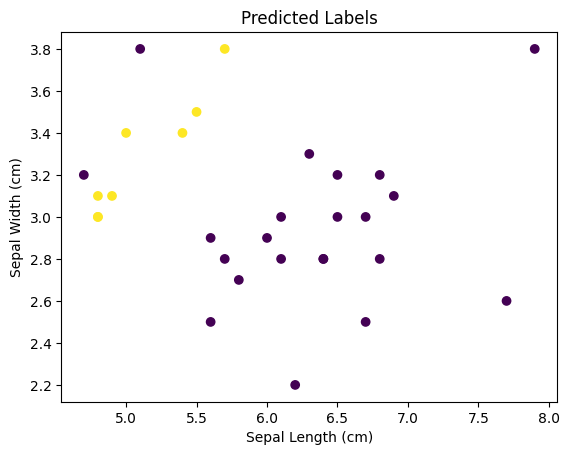

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# hot encode the labels - unique numeric conversion for non numeric variables
num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Neural network architecture
input_size = X.shape[1]
hidden1_size = 8
hidden2_size = 8
output_size = num_classes
learning_rate = 0.01
epochs = 1000

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Initialize weights and biases
np.random.seed(42)
weights_hidden1 = np.random.randn(input_size, hidden1_size)
biases_hidden1 = np.zeros((1, hidden1_size))
weights_hidden2 = np.random.randn(hidden1_size, hidden2_size)
biases_hidden2 = np.zeros((1, hidden2_size))
weights_output = np.random.randn(hidden2_size, output_size)
biases_output = np.zeros((1, output_size))

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden1_input = np.dot(X_train, weights_hidden1) + biases_hidden1
    hidden1_output = relu(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden2) + biases_hidden2
    hidden2_output = relu(hidden2_input)
    output_layer_input = np.dot(hidden2_output, weights_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate loss
    loss = -np.sum(y_train * np.log(output_layer_output + 1e-10)) / len(X_train)

    # Backward pass
    output_error = output_layer_output - y_train
    output_delta = output_error * (output_layer_output * (1 - output_layer_output))

    hidden2_error = np.dot(output_delta, weights_output.T)
    hidden2_delta = hidden2_error * (hidden2_output > 0)

    hidden1_error = np.dot(hidden2_delta, weights_hidden2.T)
    hidden1_delta = hidden1_error * (hidden1_output > 0)

    # Update weights and biases
    weights_output -= learning_rate * np.dot(hidden2_output.T, output_delta)
    biases_output -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)

    weights_hidden2 -= learning_rate * np.dot(hidden1_output.T, hidden2_delta)
    biases_hidden2 -= learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)

    weights_hidden1 -= learning_rate * np.dot(X_train.T, hidden1_delta)
    biases_hidden1 -= learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)

    # Printing the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Evaluating the model on the test set
hidden1_input = np.dot(X_test, weights_hidden1) + biases_hidden1
hidden1_output = relu(hidden1_input)
hidden2_input = np.dot(hidden1_output, weights_hidden2) + biases_hidden2
hidden2_output = relu(hidden2_input)
output_layer_input = np.dot(hidden2_output, weights_output) + biases_output
output_layer_output = sigmoid(output_layer_input)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(output_layer_output, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == np.argmax(y_test, axis=1))
print(f"Accuracy on test set: {accuracy}")

# Visualize the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_labels, cmap='viridis')
plt.title('Predicted Labels')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


Architecture - ADALINE

Epoch 0, Loss: 26.390805952070828
Epoch 100, Loss: 0.03376848094489257
Epoch 200, Loss: 0.026796101003910843
Epoch 300, Loss: 0.025427608827739912
Epoch 400, Loss: 0.0242433678391268
Epoch 500, Loss: 0.023191109347403926
Epoch 600, Loss: 0.02225080530905904
Epoch 700, Loss: 0.021406005025960448
Epoch 800, Loss: 0.02064307050977232
Epoch 900, Loss: 0.01995067007627266
Epoch 1000, Loss: 0.019319364984421456
Epoch 1100, Loss: 0.018741271450780233
Accuracy on test set: 1.0


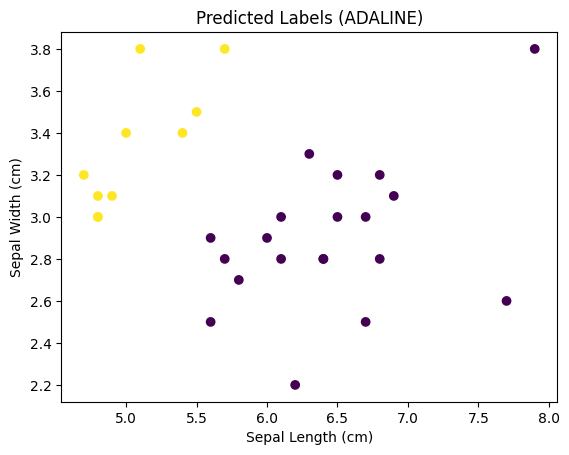

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, sentosa or not

# Add a column of ones to the input data for bias
X = np.column_stack([np.ones(X.shape[0]), X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ADALINE parameters
learning_rate = 0.0001
epochs = 1200

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X_train.shape[1])
bias = 0.0

# Training the ADALINE
for epoch in range(epochs):
    # Forward pass
    output = np.dot(X_train, weights) + bias

    # Calculate loss
    errors = y_train - output
    loss = np.mean(errors ** 2) / 2.0

    # Backward pass
    weights += learning_rate * np.dot(X_train.T, errors)
    bias += learning_rate * np.sum(errors)

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Evaluate the model on the test set
test_output = np.dot(X_test, weights) + bias
predicted_labels = (test_output >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy on test set: {accuracy}")

# Visualize the results
plt.scatter(X_test[:, 1], X_test[:, 2], c=predicted_labels, cmap='viridis')
plt.title('Predicted Labels (ADALINE)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


### Architecture - ADALINE
<br>
Here we can see the exploding gradient problem, for the set learning rate turns out to be too high in the given case
</br>


Epoch 0, Loss: 0.9849255522178955
Epoch 100, Loss: 3.8363802591531756e+77
Epoch 200, Loss: 1.869049849272586e+155
Epoch 300, Loss: 9.105842234306987e+232
Epoch 400, Loss: inf
Epoch 500, Loss: inf
Epoch 600, Loss: inf
Epoch 700, Loss: inf
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Accuracy on test set: 0.6666666666666666


<ipython-input-7-fa267854600d>:36: RuntimeWarning: overflow encountered in square
  loss = np.mean(errors ** 2) / 2.0
<ipython-input-7-fa267854600d>:39: RuntimeWarning: invalid value encountered in add
  weights += learning_rate * np.dot(X_train.T, errors)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


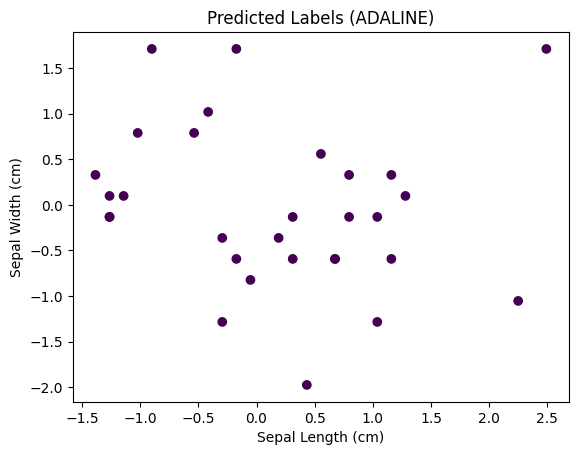

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Normalize the input features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to the input data for bias
X = np.column_stack([np.ones(X.shape[0]), X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ADALINE parameters
learning_rate = 0.01
epochs = 1000

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X_train.shape[1])
bias = 0.0

# Training the ADALINE
for epoch in range(epochs):
    # Forward pass
    output = np.dot(X_train, weights) + bias

    # Calculate loss
    errors = y_train - output
    loss = np.mean(errors ** 2) / 2.0

    # Backward pass
    weights += learning_rate * np.dot(X_train.T, errors)
    bias += learning_rate * np.sum(errors)

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Evaluate the model on the test set
test_output = np.dot(X_test, weights) + bias
predicted_labels = (test_output >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy on test set: {accuracy}")

# Visualize the results
plt.scatter(X_test[:, 1], X_test[:, 2], c=predicted_labels, cmap='viridis')
plt.title('Predicted Labels (ADALINE)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


Epoch 0, MSE Loss: 0.2608562686592882, BCE Loss: 0.7641299444419829, Hinge Loss: 0.9538423009213458
Epoch 100, MSE Loss: 0.30892477735499496, BCE Loss: 0.878838822272052, Hinge Loss: 0.8871709803931531
Epoch 200, MSE Loss: 0.3638075875695368, BCE Loss: 1.1316586204534667, Hinge Loss: 0.8895231013907434
Epoch 300, MSE Loss: 0.3857889202899459, BCE Loss: 1.2813218228249692, Hinge Loss: 0.8897458972633868
Epoch 400, MSE Loss: 0.3972622212880032, BCE Loss: 1.3816727930758055, Hinge Loss: 0.8896991493148413
Epoch 500, MSE Loss: 0.4043530472020475, BCE Loss: 1.4559572192254921, Hinge Loss: 0.889622938731762
Epoch 600, MSE Loss: 0.4092119814377245, BCE Loss: 1.5145151076311814, Hinge Loss: 0.8895541196405355
Epoch 700, MSE Loss: 0.4127761515420212, BCE Loss: 1.5626563337898756, Hinge Loss: 0.8894969434608875
Epoch 800, MSE Loss: 0.41551884831014074, BCE Loss: 1.6034277725256083, Hinge Loss: 0.8894499360802353
Epoch 900, MSE Loss: 0.4177054261646501, BCE Loss: 1.638726935815901, Hinge Loss: 0.

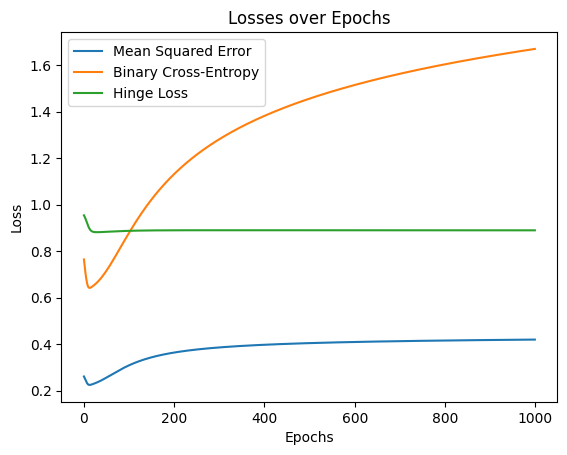

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification, setosa or not

# Normalize the input features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to the input data for bias
X = np.column_stack([np.ones(X.shape[0]), X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network architecture
input_size = X_train.shape[1]
hidden1_size = 10
hidden2_size = 5
output_size = 1
learning_rate = 0.01
epochs = 1000

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Different loss functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def hinge_loss(y_true, y_pred):
    margin = 1.0
    return np.maximum(0, margin - y_true * y_pred)

# Initialize weights and biases
np.random.seed(42)
weights_hidden1 = np.random.randn(input_size, hidden1_size)
biases_hidden1 = np.zeros((1, hidden1_size))
weights_hidden2 = np.random.randn(hidden1_size, hidden2_size)
biases_hidden2 = np.zeros((1, hidden2_size))
weights_output = np.random.randn(hidden2_size, output_size)
biases_output = np.zeros((1, output_size))

# Lists to store losses for each epoch
mse_losses = []
bce_losses = []
hinge_losses = []

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden1_input = np.dot(X_train, weights_hidden1) + biases_hidden1
    hidden1_output = sigmoid(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden2) + biases_hidden2
    hidden2_output = sigmoid(hidden2_input)
    output_layer_input = np.dot(hidden2_output, weights_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate losses
    mse_loss = mean_squared_error(y_train, output_layer_output)
    bce_loss = np.mean(binary_cross_entropy(y_train, output_layer_output))
    hinge_loss_val = np.mean(hinge_loss(y_train, output_layer_output))

    # Backward pass
    output_error = y_train.reshape(-1, 1) - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden2_error = np.dot(output_delta, weights_output.T)
    hidden2_delta = hidden2_error * sigmoid_derivative(hidden2_output)
    hidden1_error = np.dot(hidden2_delta, weights_hidden2.T)
    hidden1_delta = hidden1_error * sigmoid_derivative(hidden1_output)

    # Update weights and biases
    weights_output += learning_rate * np.dot(hidden2_output.T, output_delta)
    biases_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    weights_hidden2 += learning_rate * np.dot(hidden1_output.T, hidden2_delta)
    biases_hidden2 += learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)
    weights_hidden1 += learning_rate * np.dot(X_train.T, hidden1_delta)
    biases_hidden1 += learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)

    # Append losses to the lists
    mse_losses.append(mse_loss)
    bce_losses.append(bce_loss)
    hinge_losses.append(hinge_loss_val)

    # Print losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE Loss: {mse_loss}, BCE Loss: {bce_loss}, Hinge Loss: {hinge_loss_val}")

# Visualize the losses over epochs
plt.plot(mse_losses, label='Mean Squared Error')
plt.plot(bce_losses, label='Binary Cross-Entropy')
plt.plot(hinge_losses, label='Hinge Loss')
plt.title('Losses over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 0, MSE Loss: 0.27560619187161917, BCE Loss: 0.7496164121093325, Hinge Loss: 0.7825556990960606
Epoch 100, MSE Loss: 0.3240263679675934, BCE Loss: 0.897033301566922, Hinge Loss: 0.7326561018408771
Epoch 200, MSE Loss: 0.3345801256264927, BCE Loss: 0.9400383922241743, Hinge Loss: 0.7346802323784782
Epoch 300, MSE Loss: 0.3388016478804575, BCE Loss: 0.9636340108381257, Hinge Loss: 0.7358827955484679
Epoch 400, MSE Loss: 0.3444281585250769, BCE Loss: 0.9960129981180836, Hinge Loss: 0.7364530570358693
Epoch 500, MSE Loss: 0.3502915730204157, BCE Loss: 1.0313027058326487, Hinge Loss: 0.7367610484852971
Epoch 600, MSE Loss: 0.3559588581472155, BCE Loss: 1.0672436443631947, Hinge Loss: 0.7370062602566122
Epoch 700, MSE Loss: 0.36143699037482935, BCE Loss: 1.104560146169901, Hinge Loss: 0.7369377663486825
Epoch 800, MSE Loss: 0.3664527334685007, BCE Loss: 1.1416381642559432, Hinge Loss: 0.7364680592179177
Epoch 900, MSE Loss: 0.3708763192340647, BCE Loss: 1.1775836968023339, Hinge Loss: 0

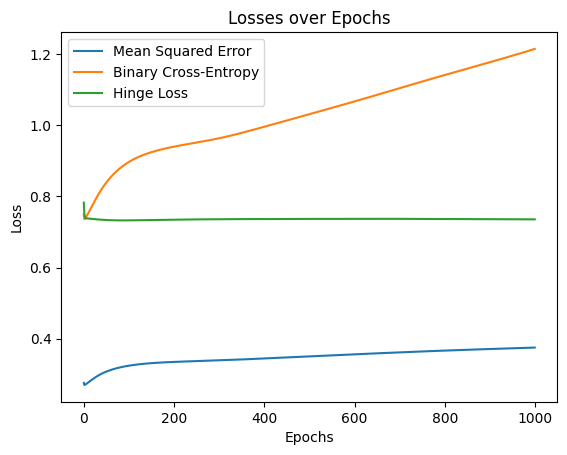

Accuracy on test set: 0.5085216513066532


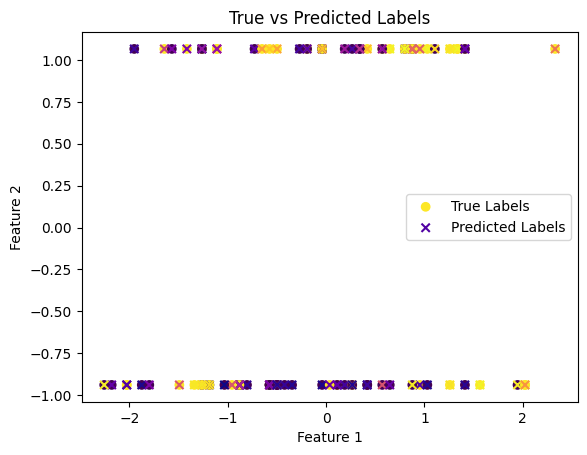

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = (diabetes.target > np.median(diabetes.target)).astype(int)  # Binary classification, diabetes or not

# Normalize the input features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to the input data for bias
X = np.column_stack([np.ones(X.shape[0]), X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network architecture
input_size = X_train.shape[1]
hidden1_size = 10
hidden2_size = 5
output_size = 1
learning_rate = 0.01
epochs = 1000

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Different loss functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def hinge_loss(y_true, y_pred):
    margin = 1.0
    return np.maximum(0, margin - y_true * y_pred)

# Initialize weights and biases
np.random.seed(42)
weights_hidden1 = np.random.randn(input_size, hidden1_size)
biases_hidden1 = np.zeros((1, hidden1_size))
weights_hidden2 = np.random.randn(hidden1_size, hidden2_size)
biases_hidden2 = np.zeros((1, hidden2_size))
weights_output = np.random.randn(hidden2_size, output_size)
biases_output = np.zeros((1, output_size))

# Lists to store losses for each epoch
mse_losses = []
bce_losses = []
hinge_losses = []

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden1_input = np.dot(X_train, weights_hidden1) + biases_hidden1
    hidden1_output = sigmoid(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden2) + biases_hidden2
    hidden2_output = sigmoid(hidden2_input)
    output_layer_input = np.dot(hidden2_output, weights_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate losses
    mse_loss = mean_squared_error(y_train, output_layer_output)
    bce_loss = np.mean(binary_cross_entropy(y_train, output_layer_output))
    hinge_loss_val = np.mean(hinge_loss(y_train, output_layer_output))

    # Backward pass
    output_error = y_train.reshape(-1, 1) - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden2_error = np.dot(output_delta, weights_output.T)
    hidden2_delta = hidden2_error * sigmoid_derivative(hidden2_output)
    hidden1_error = np.dot(hidden2_delta, weights_hidden2.T)
    hidden1_delta = hidden1_error * sigmoid_derivative(hidden1_output)

    # Update weights and biases
    weights_output += learning_rate * np.dot(hidden2_output.T, output_delta)
    biases_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    weights_hidden2 += learning_rate * np.dot(hidden1_output.T, hidden2_delta)
    biases_hidden2 += learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)
    weights_hidden1 += learning_rate * np.dot(X_train.T, hidden1_delta)
    biases_hidden1 += learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)

    # Append losses to the lists
    mse_losses.append(mse_loss)
    bce_losses.append(bce_loss)
    hinge_losses.append(hinge_loss_val)

    # Print losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE Loss: {mse_loss}, BCE Loss: {bce_loss}, Hinge Loss: {hinge_loss_val}")

# Visualize the losses over epochs
plt.plot(mse_losses, label='Mean Squared Error')
plt.plot(bce_losses, label='Binary Cross-Entropy')
plt.plot(hinge_losses, label='Hinge Loss')
plt.title('Losses over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
def predict(X):
    hidden1_input = np.dot(X, weights_hidden1) + biases_hidden1
    hidden1_output = sigmoid(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden2) + biases_hidden2
    hidden2_output = sigmoid(hidden2_input)
    output_layer_input = np.dot(hidden2_output, weights_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)
    return output_layer_output

test_output = predict(X_test)
predicted_labels = (test_output >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy on test set: {accuracy}")

# Visualize predictions for each class
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis', label='True Labels')
plt.scatter(X_test[:, 1], X_test[:, 2], c=test_output.flatten(), cmap='plasma', marker='x', label='Predicted Labels')
plt.title('True vs Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Epoch 0, MSE Loss: 0.27560619187161917, BCE Loss: 0.7496164121093325, Hinge Loss: 0.7825556990960606
Epoch 100, MSE Loss: 0.3240263679675934, BCE Loss: 0.897033301566922, Hinge Loss: 0.7326561018408771
Epoch 200, MSE Loss: 0.3345801256264927, BCE Loss: 0.9400383922241743, Hinge Loss: 0.7346802323784782
Epoch 300, MSE Loss: 0.3388016478804575, BCE Loss: 0.9636340108381257, Hinge Loss: 0.7358827955484679
Epoch 400, MSE Loss: 0.3444281585250769, BCE Loss: 0.9960129981180836, Hinge Loss: 0.7364530570358693
Epoch 500, MSE Loss: 0.3502915730204157, BCE Loss: 1.0313027058326487, Hinge Loss: 0.7367610484852971
Epoch 600, MSE Loss: 0.3559588581472155, BCE Loss: 1.0672436443631947, Hinge Loss: 0.7370062602566122
Epoch 700, MSE Loss: 0.36143699037482935, BCE Loss: 1.104560146169901, Hinge Loss: 0.7369377663486825
Epoch 800, MSE Loss: 0.3664527334685007, BCE Loss: 1.1416381642559432, Hinge Loss: 0.7364680592179177
Epoch 900, MSE Loss: 0.3708763192340647, BCE Loss: 1.1775836968023339, Hinge Loss: 0

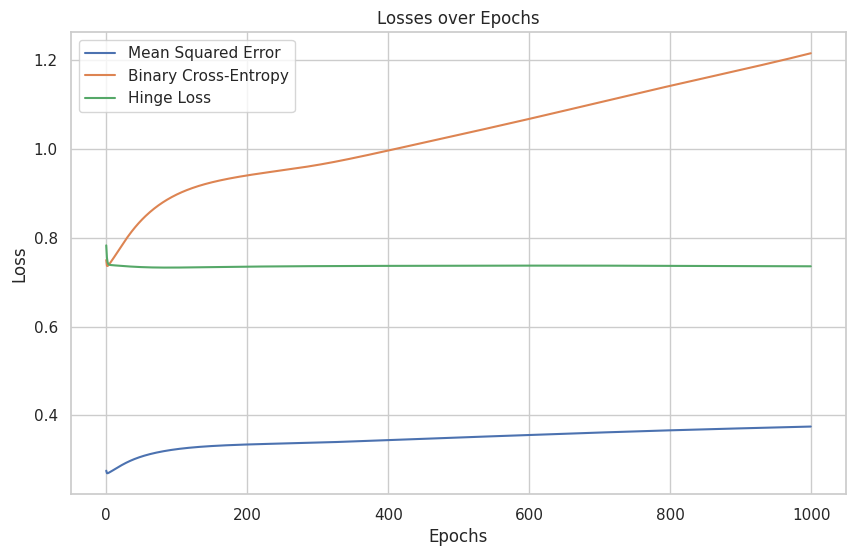

Accuracy on test set: 0.5085216513066532


<Figure size 1200x800 with 0 Axes>

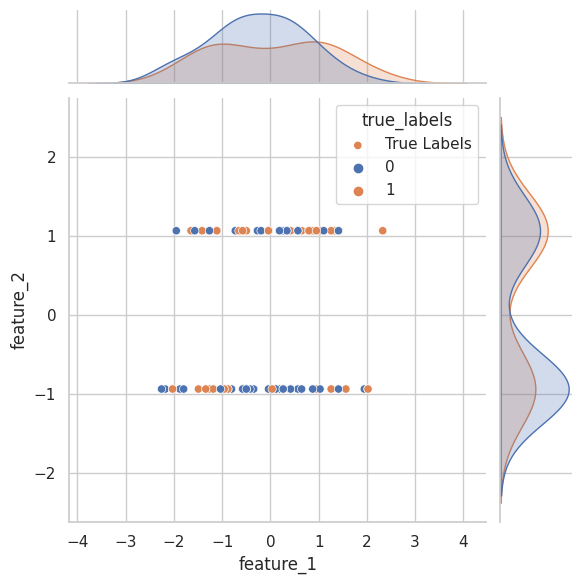

<Figure size 1200x800 with 0 Axes>

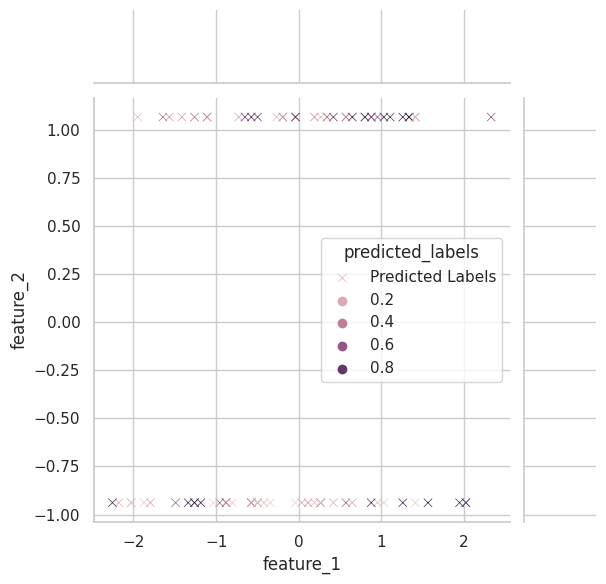

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = (diabetes.target > np.median(diabetes.target)).astype(int)  # Binary classification, diabetes or not

# Normalize the input features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to the input data for bias
X = np.column_stack([np.ones(X.shape[0]), X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network architecture
input_size = X_train.shape[1]
hidden1_size = 10
hidden2_size = 5
output_size = 1
learning_rate = 0.01
epochs = 1000

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
np.random.seed(42)
weights_hidden1 = np.random.randn(input_size, hidden1_size)
biases_hidden1 = np.zeros((1, hidden1_size))
weights_hidden2 = np.random.randn(hidden1_size, hidden2_size)
biases_hidden2 = np.zeros((1, hidden2_size))
weights_output = np.random.randn(hidden2_size, output_size)
biases_output = np.zeros((1, output_size))

# Lists to store losses for each epoch
mse_losses = []
bce_losses = []
hinge_losses = []

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden1_input = np.dot(X_train, weights_hidden1) + biases_hidden1
    hidden1_output = sigmoid(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden2) + biases_hidden2
    hidden2_output = sigmoid(hidden2_input)
    output_layer_input = np.dot(hidden2_output, weights_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate losses
    mse_loss = mean_squared_error(y_train, output_layer_output)
    bce_loss = np.mean(binary_cross_entropy(y_train, output_layer_output))
    hinge_loss_val = np.mean(hinge_loss(y_train, output_layer_output))

    # Backward pass
    output_error = y_train.reshape(-1, 1) - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden2_error = np.dot(output_delta, weights_output.T)
    hidden2_delta = hidden2_error * sigmoid_derivative(hidden2_output)
    hidden1_error = np.dot(hidden2_delta, weights_hidden2.T)
    hidden1_delta = hidden1_error * sigmoid_derivative(hidden1_output)

    # Update weights and biases
    weights_output += learning_rate * np.dot(hidden2_output.T, output_delta)
    biases_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    weights_hidden2 += learning_rate * np.dot(hidden1_output.T, hidden2_delta)
    biases_hidden2 += learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)
    weights_hidden1 += learning_rate * np.dot(X_train.T, hidden1_delta)
    biases_hidden1 += learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)

    # Append losses to the lists
    mse_losses.append(mse_loss)
    bce_losses.append(bce_loss)
    hinge_losses.append(hinge_loss_val)

    # Print losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE Loss: {mse_loss}, BCE Loss: {bce_loss}, Hinge Loss: {hinge_loss_val}")

# Visualize the losses over epochs using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(epochs), y=mse_losses, label='Mean Squared Error')
sns.lineplot(x=range(epochs), y=bce_losses, label='Binary Cross-Entropy')
sns.lineplot(x=range(epochs), y=hinge_losses, label='Hinge Loss')
plt.title('Losses over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_output = predict(X_test)
predicted_labels = (test_output >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy on test set: {accuracy}")

sns.set(style='whitegrid')

# Use the actual features from the diabetes dataset for the joint plot
jointplot_features = ["feature_1", "feature_2"]  # Replace with actual feature names

df = pd.DataFrame(data=X_test[:, 1:3], columns=jointplot_features)
df["predicted_labels"] = test_output.flatten()
df["true_labels"] = y_test

plt.figure(figsize=(12, 8))
sns.jointplot(data=df, x=jointplot_features[0], y=jointplot_features[1], hue="true_labels", marker='o', label='True Labels')
plt.figure(figsize=(12, 8))
sns.jointplot(data=df, x=jointplot_features[0], y=jointplot_features[1], hue="predicted_labels", marker='x', label='Predicted Labels')
plt.show()